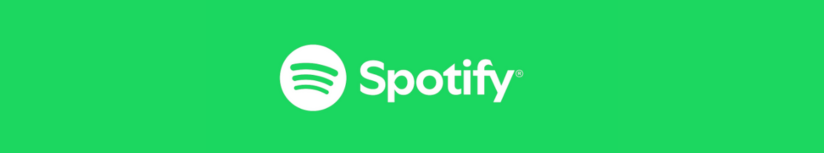

## Introduction <a class="anchor"  id="intro"></a>

#### About Spotify:
Founded in 2006, [Spotify](https://open.spotify.com/) is a leading music streaming platform that provides access to millions of songs, podcasts, and audio content. The company leverages technology and data to offer personalized recommendations and content discovery, while also offering a freemium model supported by advertising and premium subscription options.

#### Industry focus:
Music streaming, podcasting, audio content, technology, and advertising

#### Purpose of the Analysis:
The goal of this audio data analysis is to uncover key insights and patterns within Spotify's vast music and audio streaming datasets. By analyzing the characteristics of songs, such as their popularity, danceability, energy, and acousticness, we aim to understand what makes tracks more appealing and how various audio features contribute to listener preferences.

#### Overview of the Datasets:
We are utilizing 2 different datasets:

1. **tracks.csv** from the [Spotify Datasets](https://www.kaggle.com/datasets/lehaknarnauli/spotify-datasets) collection, containing 586,672 entries. This dataset includes:
    * **Track Details:** Song ID, name, popularity, duration, explicit content flag, and artist information.
    * **Audio Features:** Danceability, energy, loudness, speechiness, acousticness, instrumentalness, valence, and tempo.
    * **Other Attributes:** Release date, key, mode, and time signature.
    
2. **SpotifyFeatures.csv** from the [Spotify Tracks DB](https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db), consisting of 232,725 entries. This dataset provides:
    * **Genre Information:** Genre of the song.
    * **Artist and Track Data:** Artist name, track name, track ID.
    * **Audio Features:** Acousticness, danceability, energy, liveness, loudness, speechiness, valence, and tempo.
    * **Other Attributes:** Key, mode, duration, and time signature.

By comparing these datasets, we aim to analyze how audio features like danceability, energy, and valence are linked to a song's popularity across different genres and time periods.

## Load & Explore Data <a class="anchor"  id="load"></a>

In [1]:
# Import libraries
import numpy as np # for numerical operations
import pandas as pd # for data manipulation and analysis
import matplotlib.pyplot as plt # for creating static visualizations
import seaborn as sns # for statistical data visualization

In [2]:
# Import datasets and assign new names
df_tracks = pd.read_csv('/kaggle/input/spotify-datasets/tracks.csv')
df_genre = pd.read_csv('/kaggle/input/ultimate-spotify-tracks-db/SpotifyFeatures.csv') 

### Exploring `tracks.csv` <a class="anchor"  id="explore_tracks"></a>
I'll first inspect the `tracks.csv` dataset to understand its structure and features, while checking for missing values and duplicates.

In [3]:
# Preview the first 5 rows of tracks.csv
print("tracks.csv")
df_tracks.head()

tracks.csv


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [4]:
# View tracks.csv structure
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [5]:
#Check for null values
pd.isnull(df_tracks).sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

Here, you can see that the **`name`** column contains **71 null values**, while all other columns are free of null values

In [6]:
# Check for duplicate rows in tracks.csv
df_tracks.duplicated().sum()

0

In [7]:
# Look at the distribution of unique artists 
df_tracks['artists'].value_counts()

artists
['Die drei ???']                   3856
['TKKG Retro-Archiv']              2006
['Benjamin Blümchen']              1503
['Bibi Blocksberg']                1472
['Lata Mangeshkar']                1373
                                   ... 
['IU', 'Jang Yi-jeong']               1
['黃宗澤']                               1
['Vincy Chan', '海鳴威']                 1
['Dough-Boy']                         1
['Gentle Bones', 'Clara Benin']       1
Name: count, Length: 114030, dtype: int64

#### Artists Distribution Insights

- **Diverse Range**: The **`artists`** column contains **114,030 unique entries**, indicating a wide variety of artists.

- **Most Frequent Artist**: The artist **Die drei ???** has **3,856** tracks, suggesting significant popularity.

- **Collaborations**: Some entries feature multiple artists, reflecting common collaborations in the music industry.

- **Analysis Potential**: This distribution allows for further exploration of artist popularity, audio features, and genre diversity.

### Exploring `SpotifyFeatures.csv` <a class="anchor"  id="explore_genre"></a>

After exploring the 1st dataset, I'll now move on to the 2nd dataset, `SpotifyFeatures.csv`.

In [8]:
# Preview the first 5 rows of SpotifyFeatures.csv
print("SpotifyFeatures.csv")
df_genre.head()

SpotifyFeatures.csv


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [9]:
# View tracks.csv structure
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [10]:
#Check for null values
pd.isnull(df_genre).sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

The **`track_name`** column contains **1 null value**, while all other columns are free of null values


In [11]:
# Check for duplicate rows in tracks.csv
df_genre.duplicated().sum()

0

In [12]:
# Look at the distribution of unique genres 
df_genre['genre'].value_counts()

genre
Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: count, dtype: int64

#### Genre Distribution Insights

- **Diverse Representation**: The dataset features a wide variety of genres, indicating a broad range of musical styles.

- **Most Popular Genres**: Genres like **Comedy**, **Soundtrack**, **Indie**, and **Jazz** each have over 9,000 tracks, suggesting strong listener engagement.

- **Niche Genres**: Genres such as **A Capella** have significantly fewer tracks (119), indicating a more niche market.

- **Potential for Analysis**: The balanced genre distribution allows for further analysis of audio features (e.g., danceability, energy) across popular genres and their relationship to genre popularity.

This genre distribution highlights the dataset's richness and lays the groundwork for exploring musical trends.

-------------------------

Having explored the datasets and gained valuable insights into their structures and characteristics, I'll now proceed to the data cleaning process to ensure the data is ready for analysis.

## Data Cleaning <a class="anchor"  id="clean"></a>
To prepare the datasets for analysis, I will perform the following cleaning steps: handling missing values, converting data types, and conducting final checks to ensure data integrity.

### Handle Null Values <a class="anchor"  id="nulls"></a>

In [13]:
# Look at the null rows in tracks.csv
null_rows = df_tracks[df_tracks['name'].isnull()][['name', 'artists', 'popularity']]  # Adjust columns as needed
print(null_rows)

       name artists  popularity
226336  NaN    ['']          28
510975  NaN    ['']           0
510976  NaN    ['']           0
510978  NaN    ['']           0
510979  NaN    ['']           0
...     ...     ...         ...
517206  NaN    ['']           2
517215  NaN    ['']           2
520127  NaN    ['']           6
525238  NaN    ['']          26
525265  NaN    ['']          24

[71 rows x 3 columns]


Given that there are **586,672 entries** in the dataset, I have decided to drop the **71 null values** in the **`name`** column. These null values represent tracks with **empty artists** and **low popularity scores**, contributing to their lack of meaningful data. Since they account for a very small proportion of the overall dataset, their absence will not significantly affect the analysis.

In [14]:
# Drop rows with missing 'name'
df_tracks.dropna(subset=['name'], inplace=True)

In [15]:
# Look at the null row in SpotifyFeatures.csv
null_rows_genre = df_genre[df_genre['track_name'].isnull()][['track_name', 'artist_name', 'popularity']]  # Adjust columns as needed
print(null_rows_genre)

       track_name        artist_name  popularity
208285        NaN  Elevation Worship          44


I've decided to drop the null value in the **`track_name`** column from `SpotifyFeatures.csv`, as it represents a very small proportion of the overall **232,725 entries**, ensuring that the analysis remains valid without the impact of incomplete data.

In [16]:
# Dropping the row with missing 'track_name'
df_genre = df_genre.dropna(subset=['track_name'])

### Convert data types <a class="anchor"  id="convert"></a>

In [17]:
# Convert release_date to datetime, handling cases where only the year is provided
df_tracks['release_date'] = pd.to_datetime(df_tracks['release_date'].apply(lambda date: f"{date}-01-01" if len(str(date)) == 4 else date), errors='coerce')

# Check the data types and display release_date column
print(df_tracks.dtypes)
print(df_tracks['release_date'])

id                          object
name                        object
popularity                   int64
duration_ms                  int64
explicit                     int64
artists                     object
id_artists                  object
release_date        datetime64[ns]
danceability               float64
energy                     float64
key                          int64
loudness                   float64
mode                         int64
speechiness                float64
acousticness               float64
instrumentalness           float64
liveness                   float64
valence                    float64
tempo                      float64
time_signature               int64
dtype: object
0        1922-02-22
1        1922-06-01
2        1922-03-21
3        1922-03-21
4        1922-01-01
            ...    
586667   2020-09-26
586668   2020-10-21
586669   2020-09-02
586670   2021-03-05
586671   2015-07-01
Name: release_date, Length: 586601, dtype: datetime64[ns]


The `mode` column in `SpotifyFeatures.csv` has been converted to a binary format (0 for **minor** and 1 for **major**) to maintain consistency with the format used in the `tracks.csv` dataset, enhancing compatibility for analysis and modeling.

In [18]:
# Convert the 'mode' column to binary
df_genre['mode_binary'] = df_genre['mode'].map({'Minor': 0, 'Major': 1})

# Print the new 'mode_binary' column to check the conversion
print(df_genre['mode_binary'])

0         1
1         0
2         0
3         1
4         1
         ..
232720    1
232721    0
232722    1
232723    1
232724    0
Name: mode_binary, Length: 232724, dtype: int64


To also enable consistency across datasets, the `key` column will be converted into a numeric format using a predefined mapping, where each musical key (e.g., 'C', 'C#', 'D', etc.) is replaced with a corresponding integer value. 

In [19]:
# Define the mapping for the key column
key_mapping = {
    'C': 0,
    'C#': 1,
    'D': 2,
    'D#': 3,
    'E': 4,
    'F': 5,
    'F#': 6,
    'G': 7,
    'G#': 8,
    'A': 9,
    'A#': 10,
    'B': 11
}

# Convert the 'key' column to numeric using the defined mapping
df_genre['key_numeric'] = df_genre['key'].map(key_mapping)

# Print the new 'key_numeric' column to check the conversion
print(df_genre['key_numeric'])

0         1
1         6
2         0
3         1
4         5
         ..
232720    2
232721    4
232722    2
232723    9
232724    8
Name: key_numeric, Length: 232724, dtype: int64


I've decided not to change the numerical representations of time signatures in the dataset, as I'm not entirely sure what each numerical value corresponds to in terms of traditional time signatures. This ensures that I maintain the integrity of the data while I analyze the relationship between time signatures and other musical features.

Converting duration from milliseconds to seconds to enhance readability.

In [20]:
# Convert duration's milli seconds(ms) into seconds(s)
df_tracks['duration'] = df_tracks['duration_ms'].apply(lambda x: round(x/1000))

# Drop original duration column
df_tracks.drop('duration_ms', inplace=True, axis=1)

# Display the first 5 rows of the duration column 
df_tracks.duration.head()

0    127
1     98
2    182
3    177
4    163
Name: duration, dtype: int64

In [21]:
# Convert duration's milli seconds(ms) into seconds(s)
df_genre['duration'] = df_genre['duration_ms'].apply(lambda x: round(x/1000))

# Drop original duration column
df_genre.drop('duration_ms', inplace=True, axis=1)

# Display the first 5 rows of the duration column 
df_genre.duration.head()

0     99
1    137
2    170
3    152
4     83
Name: duration, dtype: int64

In [22]:
# Final check
df_tracks.info()
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 586601 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                586601 non-null  object        
 1   name              586601 non-null  object        
 2   popularity        586601 non-null  int64         
 3   explicit          586601 non-null  int64         
 4   artists           586601 non-null  object        
 5   id_artists        586601 non-null  object        
 6   release_date      584499 non-null  datetime64[ns]
 7   danceability      586601 non-null  float64       
 8   energy            586601 non-null  float64       
 9   key               586601 non-null  int64         
 10  loudness          586601 non-null  float64       
 11  mode              586601 non-null  int64         
 12  speechiness       586601 non-null  float64       
 13  acousticness      586601 non-null  float64       
 14  instrumen

## Exploratory Data Analysis (EDA) <a class="anchor"  id="eda"></a>

### Summary Statistics <a class="anchor"  id="summary"></a>

In [23]:
# Select only the numerical columns except 'release_date'
num_columns = df_tracks.drop(columns=['release_date'])

# Display the summary statistics for 1st dataset
print("Summary Statistics for tracks.csv:")
num_columns.describe().transpose()

Summary Statistics for tracks.csv:


,count,mean,std,min,25%,50%,75%,max
popularity,586601.0,27.573212,18.369417,0.0,13.0000,27.000000,41.00000,100.000
explicit,586601.0,0.044091,0.205298,0.0,0.0000,0.000000,0.00000,1.000
danceability,586601.0,0.563612,0.166101,0.0,0.4530,0.577000,0.68600,0.991
energy,586601.0,0.542071,0.251910,0.0,0.3430,0.549000,0.74800,1.000
key,586601.0,5.221594,3.519420,0.0,2.0000,5.000000,8.00000,11.000
loudness,586601.0,-10.205789,5.089422,-60.0,-12.8910,-9.242000,-6.48100,5.376
mode,586601.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586601.0,0.104870,0.179902,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586601.0,0.449803,0.348812,0.0,0.0969,0.422000,0.78400,0.996
instrumentalness,586601.0,0.113425,0.266843,0.0,0.0000,0.000024,0.00955,1.000


#### Key insights & trends for `tracks.csv`

- **Popularity**: Average score is 27.57, indicating many obscure tracks alongside a few hits.
  
- **Track Duration**: Average length is ~3:50 with a standard deviation of 126.53 seconds, reflecting varied song structures.

- **Explicit Content**: Only 4.41% of tracks are explicit, suggesting a predominantly family-friendly catalog.

- **Danceability and Energy**: Moderate averages (0.56 and 0.54) show a diverse range of music styles.

- **Production Styles**: Average loudness is -10.21 dB with a range from -60 dB, highlighting different production techniques.

- **Acoustic and Instrumental Features**: Instrumentalness is low (0.11), indicating more vocal tracks; acousticness averages at 0.45.

- **Valence and Tempo**: Average valence is 0.55, suggesting mostly positive emotions; common tempo is 118 BPM with 4/4 time signature dominance.

This analysis highlights the eclectic nature of the dataset, showcasing both niche and mainstream tracks with distinct musical characteristics.

In [24]:
# Display the summary statistics for 2nd dataset
print("Summary Statistics for SpotifyFeatures.csv:")
df_genre.describe().transpose()

Summary Statistics for SpotifyFeatures.csv:


,count,mean,std,min,25%,50%,75%,max
popularity,232724.0,41.127490,18.189986,0.00000,29.0000,43.000000,55.0000,100.000
acousticness,232724.0,0.368562,0.354768,0.00000,0.0376,0.232000,0.7220,0.996
danceability,232724.0,0.554366,0.185608,0.05690,0.4350,0.571000,0.6920,0.989
energy,232724.0,0.570958,0.263456,0.00002,0.3850,0.605000,0.7870,0.999
instrumentalness,232724.0,0.148302,0.302769,0.00000,0.0000,0.000044,0.0358,0.999
liveness,232724.0,0.215010,0.198273,0.00967,0.0974,0.128000,0.2640,1.000
loudness,232724.0,-9.569896,5.998215,-52.45700,-11.7710,-7.762000,-5.5010,3.744
speechiness,232724.0,0.120765,0.185519,0.02220,0.0367,0.050100,0.1050,0.967
tempo,232724.0,117.666494,30.898942,30.37900,92.9590,115.777500,139.0545,242.903
valence,232724.0,0.454919,0.260065,0.00000,0.2370,0.444000,0.6600,1.000


#### Key insights & trends for `SpotifyFeatures.csv`

- **Popularity**: Average of 41.13, indicating a larger share of popular tracks compared to previous datasets.
  
- **Acousticness**: Moderate average of 0.37, reflecting a presence of acoustic elements.

- **Danceability**: Average of 0.55, suggesting many tracks are suitable for dancing.

- **Track Duration**: Average duration of approximately 3.92 minutes, with some very long tracks.

- **Energy**: Average of 0.57, indicating a generally energetic collection of tracks.

- **Instrumentalness**: Average of 0.15, showing most tracks are not instrumental.

- **Liveness**: Average of 0.22, suggesting low audience presence in recordings.

- **Loudness**: Average of -9.57 dB, reflecting diverse production styles.

- **Speechiness**: Average of 0.12, indicating low prevalence of spoken words.

- **Tempo**: Average tempo of 117.67 BPM, suggesting a balanced mix of fast and slow tracks.

- **Valence**: Average of 0.45, indicating a generally positive emotional tone.

- **Mode Binary**: Average of 0.65, indicating a majority of tracks are in a major key.

- **Key Numeric**: Average key value of 5.22, showing diverse musical key usage.

The dataset presents a diverse range of music tracks, showcasing varying popularity, characteristics, and production styles that cater to a wide audience.

#### Comparison

- **Popularity**: The average popularity in `tracks.csv` is 27.57, significantly lower than 41.13 in `SpotifyFeatures.csv`, indicating more obscure tracks in the former.

- **Duration**: Average track duration is similar, with `tracks.csv` at approximately 3.83 minutes (230,055 ms) and `SpotifyFeatures.csv` at approximately 3.92 minutes (235,122 ms).

- **Energy**: Tracks in `SpotifyFeatures.csv` have a higher average energy level (0.57) compared to `tracks.csv` (0.54), suggesting a generally more energetic selection.

- **Acousticness**: `tracks.csv` has a higher average acousticness (0.45) than `SpotifyFeatures.csv` (0.37), indicating more acoustic elements in the former.

Overall, `tracks.csv` contains less popular and more acoustic tracks, while `SpotifyFeatures.csv` features higher energy and popularity.

### Distribution Analysis <a class="anchor"  id="distribution"></a>

Explore the distribution of key features using bar plots.

#### Distribution of genres in relation to popularity

[Text(0.5, 1.0, 'Top 5 Genres by Popularity')]

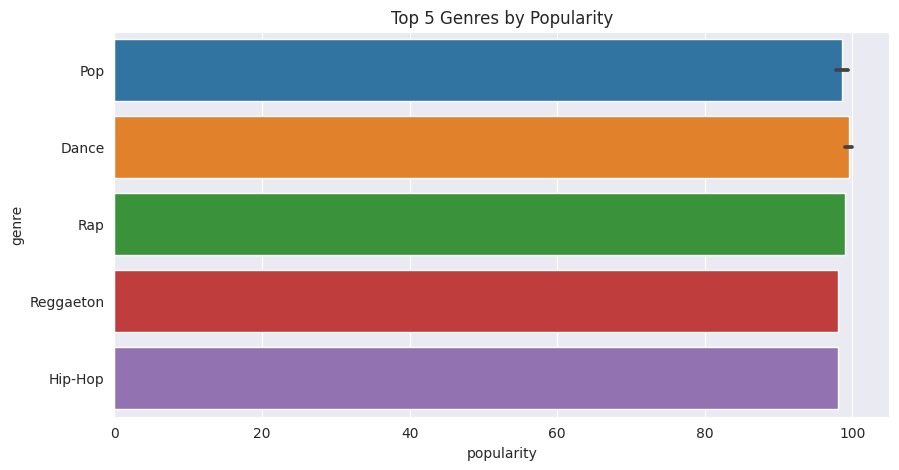

In [25]:
# Set the aesthetic style of the plots to darkgrid for better visualization and define the figure size
sns.set_style(style = "darkgrid")
plt.figure(figsize = (10,5))

# Sort by popularity and select top 10 entries
famous = df_genre.sort_values("popularity", ascending = False).head(10)

# Create barplot for top 5 genres by popularity
sns.barplot(y = "genre", x = "popularity", data = famous).set(title = "Top 5 Genres by Popularity")

- **Most Popular Genre**: Dance
- **Least Popular Genres of Top 5**: Reggaeton and Hip-Hop (tied)
- All five genres are relatively close in popularity.

#### Top 5 genres and their audio features

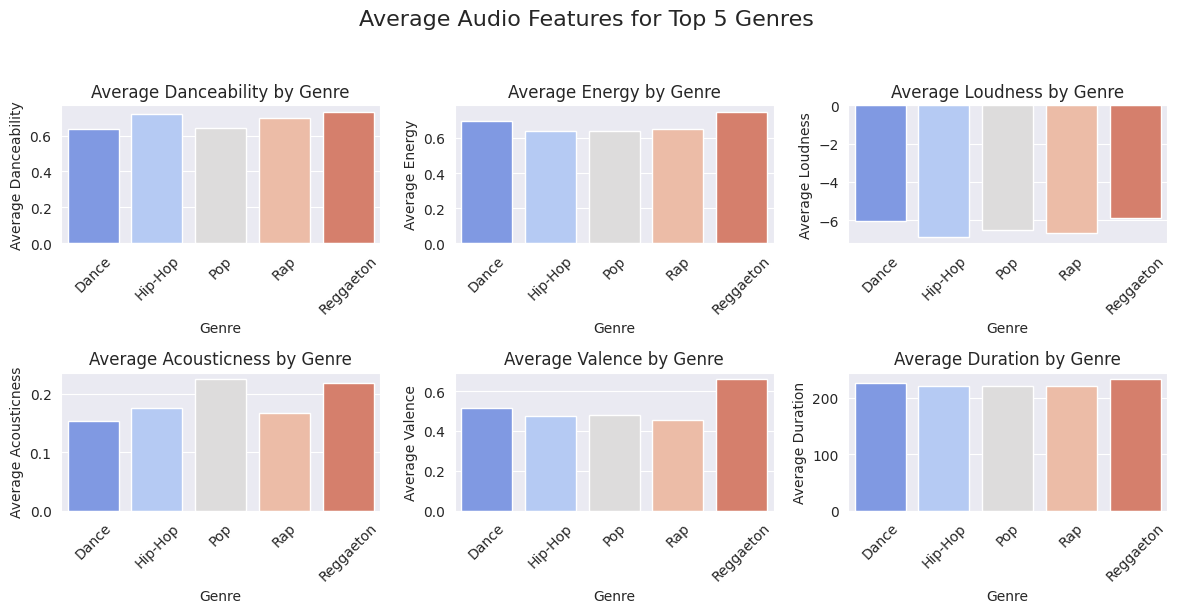

In [26]:
# Get top 5 genres
top_genres = ['Pop', 'Dance', 'Rap', 'Reggaeton', 'Hip-Hop']
filtered_df = df_genre[df_genre['genre'].isin(top_genres)]

# Calculate average audio features for the genres
genre_audio_features = filtered_df.groupby('genre').agg({
    'danceability': 'mean',
    'energy': 'mean',
    'loudness': 'mean',
    'acousticness': 'mean',
    'valence': 'mean',
    'duration': 'mean'
}).reset_index()

# Create a bar plot for each audio feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['danceability', 'energy', 'loudness', 'acousticness', 'valence', 'duration']):
    plt.subplot(3, 3, i + 1)
    sns.barplot(data=genre_audio_features, x='genre', y=feature, palette='coolwarm')
    plt.title(f'Average {feature.capitalize()} by Genre')
    plt.ylabel(f'Average {feature.capitalize()}')
    plt.xlabel('Genre')
    plt.xticks(rotation=45)
plt.suptitle('Average Audio Features for Top 5 Genres', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

* **Danceability:** High across the board, with Reggaeton leading, indicating strong suitability for dancing.
* **Energy:** Generally high, with Dance and Reggaeton showing the most energy, suggesting these genres are particularly lively and engaging.
* **Loudness:** Hip-hop is the loudest genre, reflecting its strong, impactful production style that emphasizes rhythm and lyrical delivery.
* **Acousticness:** Low across the genres, indicating a preference for electronic and digitally produced sounds.
* **Valence:** Moderate to high, suggesting that these genres often convey positive emotions.
* **Duration:**  Fairly consistent, with an average song length around 200 seconds, which seems to resonate well with listeners.

#### Comparison of the top 5 genres with the bottom 5
To analyze their audio features, identifying key differences and similarities in elements like danceability, energy, and loudness that contribute to their popularity.

In [27]:
# Sort by popularity and select bottom 5 unique entries
least_popular = df_genre.sort_values("popularity", ascending=True).drop_duplicates('genre').head(5)

# Create a list of the bottom 5 unique genres by popularity
bottom_genres = least_popular['genre'].tolist()

# Display the bottom 5 unique genres
print("Bottom 5 Least Popular Genres:")
for genre in bottom_genres:
    print(genre)

Bottom 5 Least Popular Genres:
Movie
Children's Music
Alternative
Country
Classical


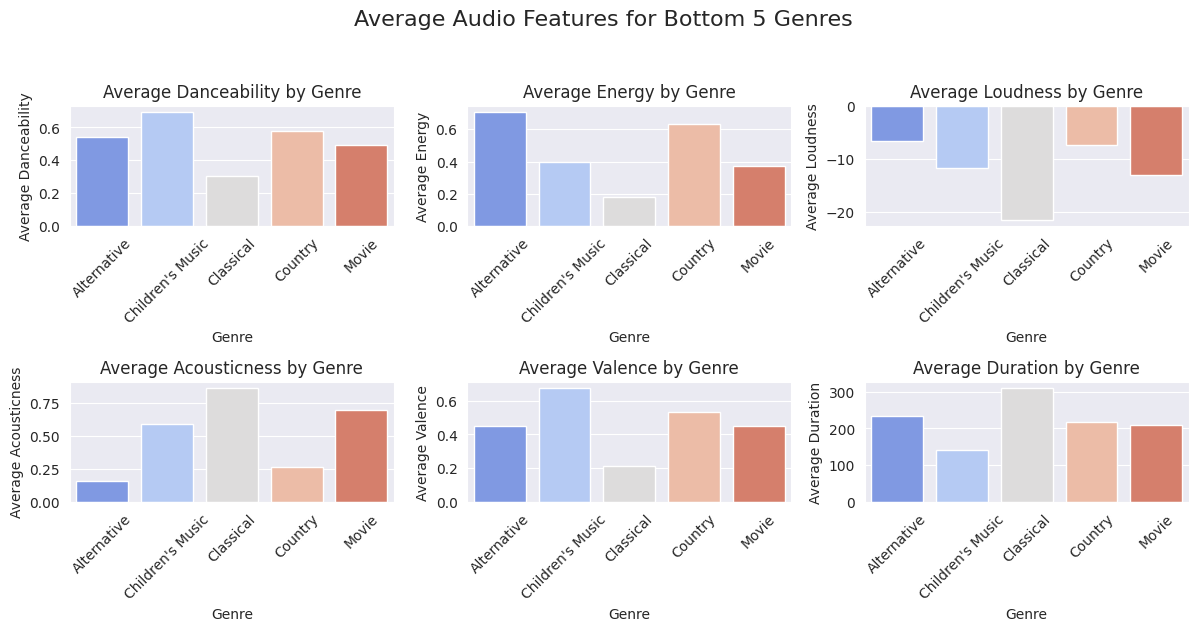

In [28]:
# Get bottom 5 genres
bottom_genres = ['Movie', "Children's Music", 'Alternative', 'Country', 'Classical']
filtered_df = df_genre[df_genre['genre'].isin(bottom_genres)]

# Calculate average audio features for the genres
genre_audio_features = filtered_df.groupby('genre').agg({
    'danceability': 'mean',
    'energy': 'mean',
    'loudness': 'mean',
    'acousticness': 'mean',
    'valence': 'mean',
    'duration': 'mean'
}).reset_index()

# Create a bar plot for each audio feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['danceability', 'energy', 'loudness', 'acousticness', 'valence', 'duration']):
    plt.subplot(3, 3, i + 1)
    sns.barplot(data=genre_audio_features, x='genre', y=feature, palette='coolwarm')
    plt.title(f'Average {feature.capitalize()} by Genre')
    plt.ylabel(f'Average {feature.capitalize()}')
    plt.xlabel('Genre')
    plt.xticks(rotation=45)
plt.suptitle('Average Audio Features for Bottom 5 Genres', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

* **Danceability:** Generally lower compared to the top genres, particularly for Classical and Movie genres, indicating less emphasis on rhythm.
* **Energy:** Varied, with Alternative showing the highest energy, but overall, the energy levels are lower than in the top genres.
* **Loudness:**  Alternative and Country music have the lowest loudness, contrasting with the higher levels in the top genres.
* **Acousticness:** Higher in Movie and Classical genres, indicating more reliance on traditional instruments and acoustic sounds.
* **Valence:** Similar to the top genres, though Classical may convey more nuanced or complex emotions.
* **Duration:**  Classical tracks tend to be longer, reflecting the genre's composition style.

**Summary of Comparison:**
* **Danceability and energy:** Top genres prioritize danceability and high energy, making them suitable for club and party settings, whereas bottom genres tend to be more relaxed or narrative-driven.
* **Loudness levels:** There’s a marked difference in loudness, with top genres designed to stand out in a lively environment, while bottom genres often feature quieter, more subdued tracks.
* **Acoustic vs. electronic:** The bottom genres showcase a blend of acoustic elements, particularly in Classical and Movie, whereas the top genres lean towards electronic production.

#### Distribution of song durations across different genres

Text(0, 0.5, 'Genres')

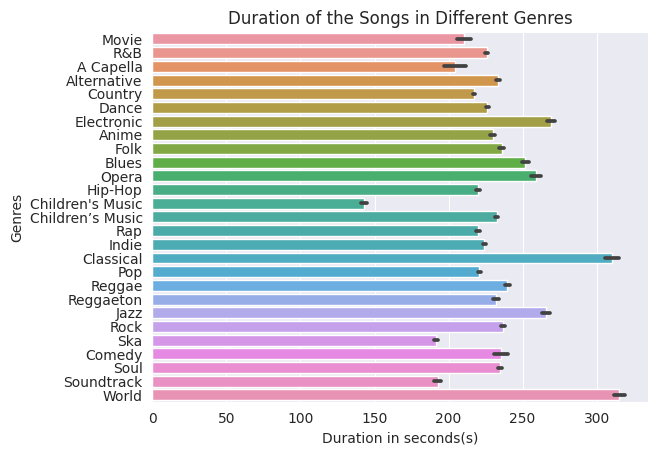

In [29]:
# Create barplot to show duration of the songs in every genre
plt.title("Duration of the Songs in Different Genres")
sns.color_palette('rocket', as_cmap = True)
sns.barplot(y = 'genre', x = 'duration', data = df_genre)
plt.xlabel("Duration in seconds(s)")
plt.ylabel("Genres")

- **Genres with Longer Duration**: Classical and World
- **Genre with Shorter Duration**: Children's Music

#### Distribution of danceability of genres

Text(0, 0.5, 'Genres')

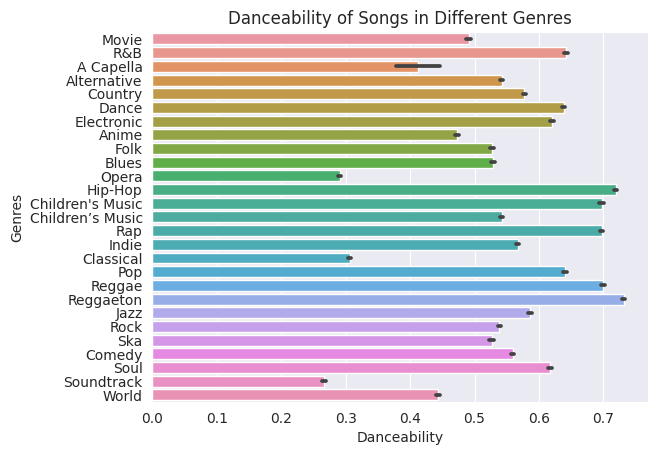

In [30]:
# Create barplot to show danceability of songs in every genre
plt.title("Danceability of Songs in Different Genres")
sns.color_palette('rocket', as_cmap = True)
sns.barplot(y = 'genre', x = 'danceability', data = df_genre)
plt.xlabel("Danceability")
plt.ylabel("Genres")

* **Genres with Highest Danceability:** Reggaeton and Hip-Hop
* **Genre with Lowest Danceability:** Soundtrack

#### Distribution of Energy Levels Across Genres:

Text(0, 0.5, 'Genres')

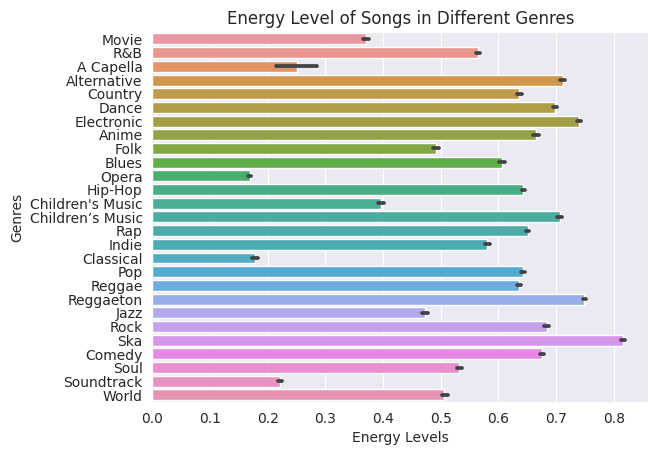

In [31]:
plt.title("Energy Level of Songs in Different Genres")
sns.color_palette('rocket', as_cmap = True)
sns.barplot(y = 'genre', x = 'energy', data = df_genre)
plt.xlabel("Energy Levels")
plt.ylabel("Genres")

* **Genres with Highest Energy Levels:** Ska, Reggaeton and Electronic
* **Genre with Lowest Energy Levels:** Opera and Classical

### Correlation Analysis

Examine the relationships between numerical features using regression plots and heatmaps to identify patterns and correlations among variables.

Sampling 4% of the dataset for regression plots to enhance performance, improve visualization clarity, and for a more focused analysis without overwhelming the output with excessive data points.

In [32]:
# Sample 4% of the whole dataset
sample_df = df_tracks.sample(int(0.004 * len(df_tracks)))

# Print the length of the sample
print("Sample length:")
print(len(sample_df))  

Sample length:
2346


#### Relationship between loudness and energy

[Text(0.5, 1.0, 'Loudness vs. Energy Correlation')]

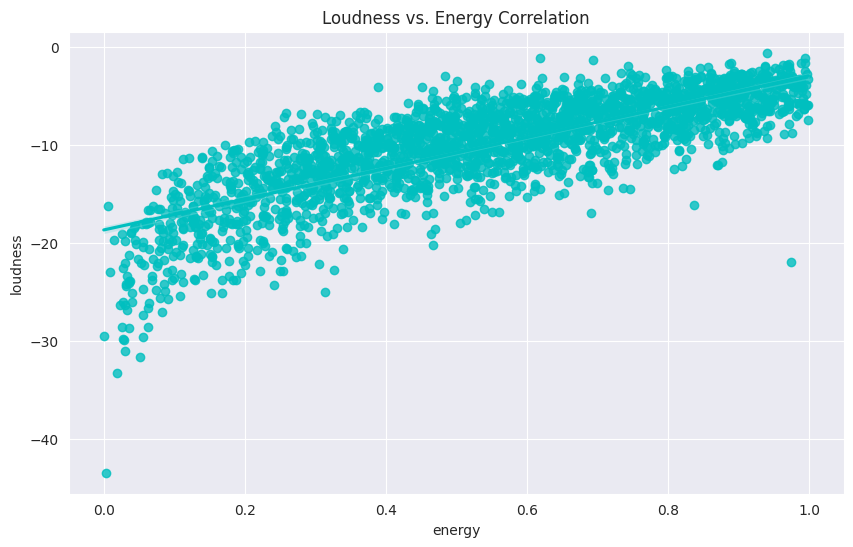

In [33]:
# Create a regression plot between loudness and energy
plt.figure(figsize = (10,6))
sns.regplot(data = sample_df, y = 'loudness', x = 'energy', color = 'c').set(title = 'Loudness vs. Energy Correlation')     

*  **High correlation between loudness and energy:** Very high positive correlation between loudness and energy; as loudness increases, energy also increases, and as loudness decreases, energy decreases.

#### Correlation matrix to visualize relationships among all numerical variables

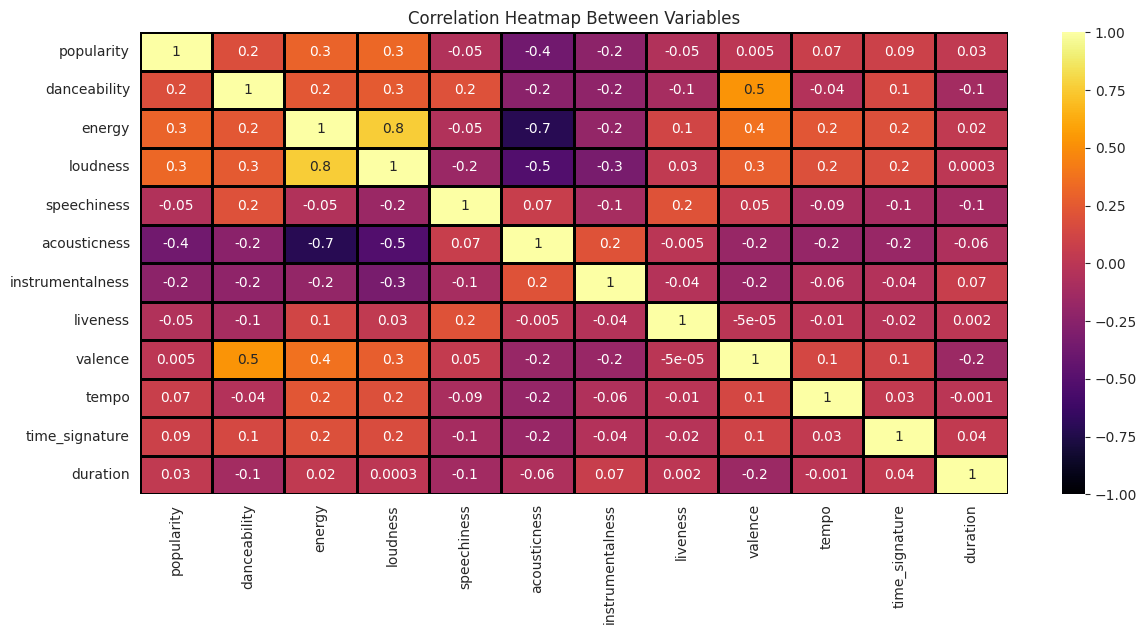

In [34]:
# Drop numeric columns
numeric_df = df_tracks.drop(['key', 'mode', 'explicit'], axis=1)

# Select only numeric columns for correlation
corr_df = numeric_df.select_dtypes(include=[np.number]).corr(method='pearson')

# Create heatmap
plt.figure(figsize=(14, 6))
heatmap = sns.heatmap(corr_df, annot=True, fmt='.1g', vmin=-1, vmax=1, center=0,
                       cmap='inferno', linewidths=1, linecolor='Black')
heatmap.set_title('Correlation Heatmap Between Variables')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
plt.show()

* **Correlation Scale**: The scale ranges from -1 to 1, where -1 indicates no correlation and 1 signifies a very high correlation.  
* **Energy and Loudness**: There is a very high positive correlation between energy and loudness.
* **Acousticness and Energy**: Acousticness has a strong negative correlation with energy.

## Feature Exploration <a class="anchor"  id="feature"></a>

### Artists & Genres
Analyze and visualize the most frequent artists and genres in the datasets.

In the data exploration portion, we observed that **Die drei ???** is the most frequent artist.

#### Most frequent artists

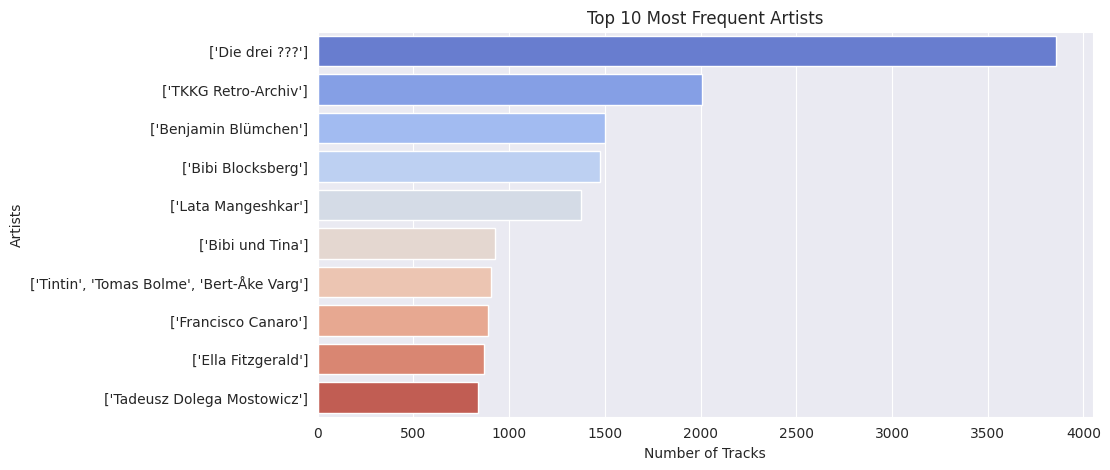

In [35]:
# Count the occurrences of each artist
artist_counts = df_tracks['artists'].value_counts().reset_index()
artist_counts.columns = ['artist', 'count']

# Select the top 10 most frequent artists
top_artists = artist_counts.head(10)

# Create a bar plot for the top 10 most frequent artists
plt.figure(figsize=(10, 5))
sns.barplot(y='artist', x='count', data=top_artists, palette='coolwarm')  # Use top_artists here
plt.title('Top 10 Most Frequent Artists')
plt.xlabel('Number of Tracks')
plt.ylabel('Artists')
plt.show()

* **Die drei ???** significantly outnumbers other artists in the dataset as the most frequent artist.

#### Most frequent genres

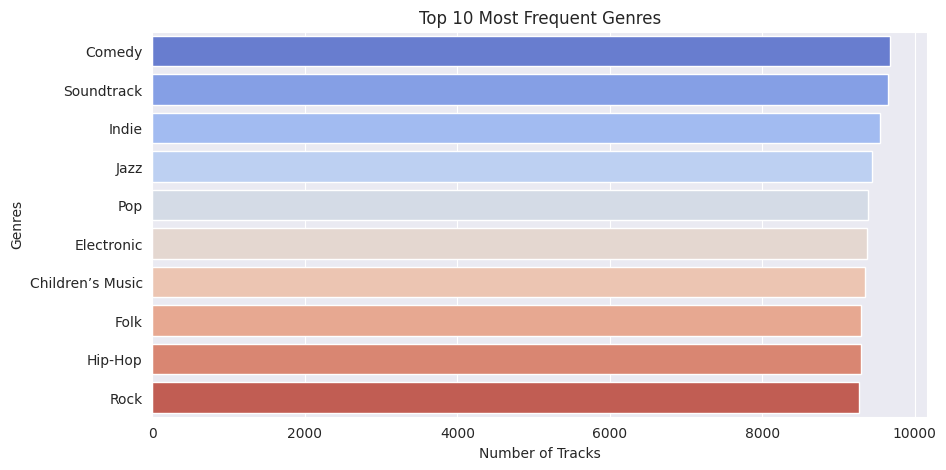

In [36]:
# Count the occurrences of each genre
genre_counts = df_genre['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

# Select the top 10 most frequent genres
top_genres = genre_counts.head(10)

# Create a bar plot for the top 10 most frequent genres
plt.figure(figsize=(10, 5))
sns.barplot(y='genre', x='count', data=top_genres, palette='coolwarm')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Number of Tracks')
plt.ylabel('Genres')
plt.show()

In [37]:
# Count total number of tracks
total_tracks = len(df_genre)

# Count number of tracks per genre
genre_counts = df_genre['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

# Calculate percentage of total tracks for each genre
genre_counts['percentage'] = (genre_counts['count'] / total_tracks) * 100
print(genre_counts)

               genre  count  percentage
0             Comedy   9681    4.159863
1         Soundtrack   9646    4.144824
2              Indie   9543    4.100565
3               Jazz   9441    4.056737
4                Pop   9386    4.033104
5         Electronic   9377    4.029236
6   Children’s Music   9353    4.018924
7               Folk   9299    3.995720
8            Hip-Hop   9295    3.994001
9               Rock   9272    3.984119
10       Alternative   9263    3.980251
11         Classical   9256    3.977243
12               Rap   9232    3.966931
13             World   9095    3.908063
14              Soul   9089    3.905485
15             Blues   9023    3.877125
16               R&B   8992    3.863804
17             Anime   8936    3.839741
18         Reggaeton   8927    3.835874
19               Ska   8874    3.813100
20            Reggae   8771    3.768842
21             Dance   8701    3.738764
22           Country   8664    3.722865
23             Opera   8280    3.557863


* **Most Frequent Genre**: Comedy
    * Represents 4.2% of the dataset.
    * Other genres closely following in frequency.

### Song Popularity vs. Other Features
Explore relationships between popularity and features using scatter plots or joint plots.

#### Most popular songs

In [38]:
# Filter for songs with popularity greater than 90 and sort them in descending order
most_popular = df_tracks.query('popularity>90', inplace=False).sort_values('popularity', ascending=False)

# Print the top 10 most popular songs
top_popular_songs = most_popular[['name', 'artists', 'popularity']]
print("Top 10 Most Popular Songs (Popularity > 90):")
display(top_popular_songs.head(10))

Top 10 Most Popular Songs (Popularity > 90):


,name,artists,popularity
93802,Peaches (feat. Daniel Caesar & Giveon),"['Justin Bieber', 'Daniel Caesar', 'Giveon']",100
93803,drivers license,['Olivia Rodrigo'],99
93804,Astronaut In The Ocean,['Masked Wolf'],98
92810,Save Your Tears,['The Weeknd'],97
92811,telepatía,['Kali Uchis'],97
92813,Blinding Lights,['The Weeknd'],96
93805,Leave The Door Open,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']",96
92814,The Business,['Tiësto'],95
91866,Streets,['Doja Cat'],94
92816,Heartbreak Anniversary,['Giveon'],94


* **Most Popular Song:** Peaches (feat. Daniel Caesar & Giveon)
    * Artist(s): Justin Bieber, Daniel Caesar, Giveon
    * Popularity Score: 100
    
#### Relationship between popularity and acousticness

[Text(0.5, 1.0, 'Popularity vs. Acousticness Correlation')]

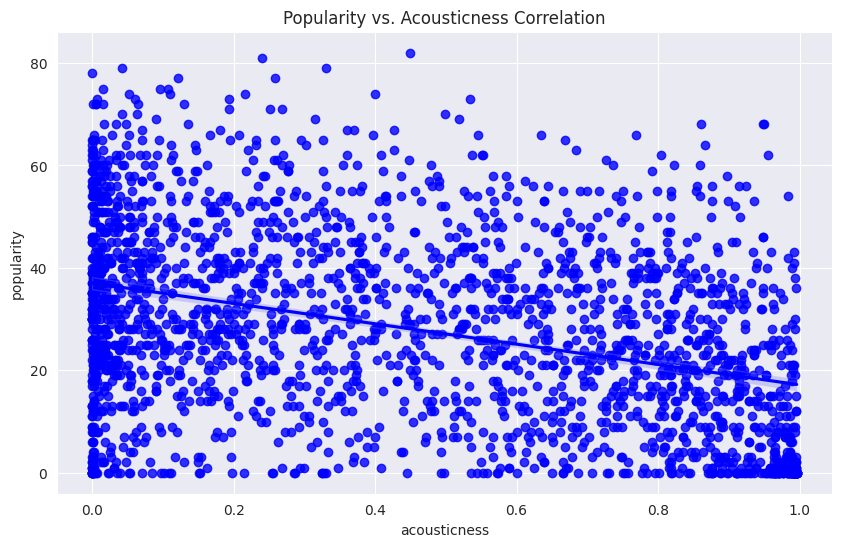

In [39]:
# Create a regression plot between popularity and acoustiness
plt.figure(figsize = (10,6))
sns.regplot(data = sample_df, y = 'popularity', x = 'acousticness', color = 'b').set(title = 'Popularity vs. Acousticness Correlation')

* **Moderate correlation between acousticness and popularity:** The regression line shows a downward trend, indicating that as acousticness increases, popularity also increases. Conversely, if acousticness decreases, popularity tends to decrease as well.

#### Relationship between popularity and danceability

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


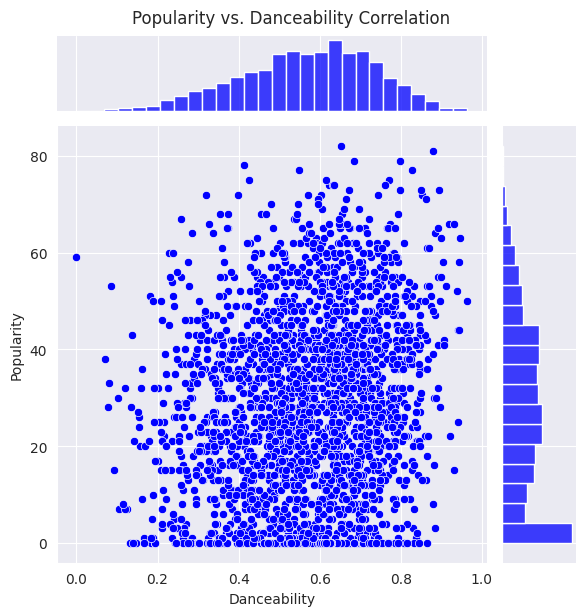

In [40]:
# Create a joint plot between popularity and danceability
joint_plot = sns.jointplot(data=sample_df, y='popularity', x='danceability', kind='scatter', color='blue')
joint_plot.fig.suptitle('Popularity vs. Danceability Correlation', y=1.02)  # Adjust the y-value for better spacing
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

* **Moderate correlation between danceability and popularity:** The scatter plot reveals an upward trend, indicating that as danceability increases, popularity also tends to rise. Conversely, lower danceability is generally linked to reduced popularity.
* **Distribution peaks:** Danceability reaches its peak around 0.6, whereas popularity has its highest concentration at 0.

## Time-Based Analysis <a class="anchor"  id="time"></a>

### Release Date Analysis
Analyze trends over time.

Set the **Release Date** column as the index to facilitate the creation of time series plots and visualizations, with the x-axis representing time.

In [41]:
# Set Release Date Column as the Index Column
df_tracks.set_index('release_date', inplace=True)
df_tracks.index = pd.to_datetime(df_tracks.index, errors='coerce')

# Display the first 5 rows of the dataset to check work
df_tracks.head()

,id,name,popularity,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
release_date,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,127
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,98
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,182
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,177
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,163


I'll create a new column that extracts the year from the **release_date** column.

In [42]:
# Extract year from release date
df_tracks['dates'] = df_tracks.index.get_level_values('release_date')
df_tracks.dates = pd.to_datetime(df_tracks.dates)
years = df_tracks.dates.dt.year

# Print the first 5 of years column to check work
print(years.head())

release_date
1922-02-22    1922.0
1922-06-01    1922.0
1922-03-21    1922.0
1922-03-21    1922.0
1922-01-01    1922.0
Name: dates, dtype: float64


#### Average song duration over time

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


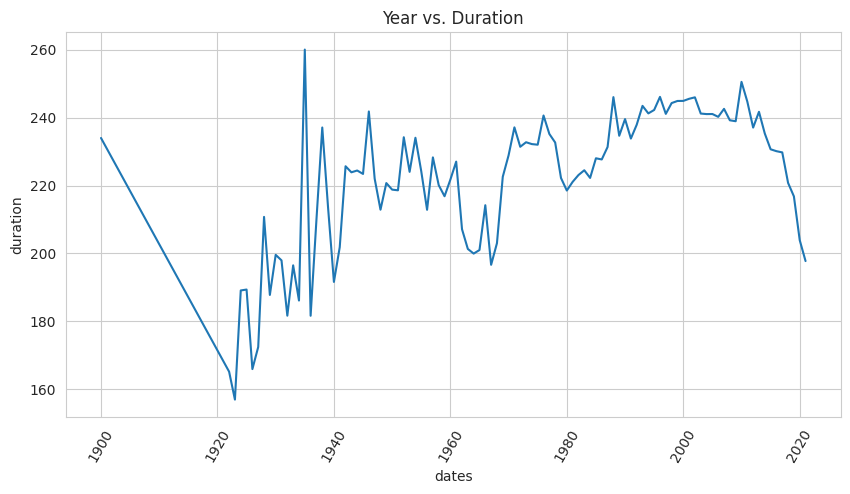

In [43]:
# Get average duration per year
df_yearly = df_tracks.groupby(years)['duration'].mean().reset_index()

# Create line graph to show the average duration of the songs for each year
sns.set_style("whitegrid")
figs_dim = (10, 5)
fig, ax = plt.subplots(figsize=figs_dim)
sns.lineplot(x=df_yearly[years.name], y=df_yearly['duration'], ax=ax).set(title="Year vs. Duration")
plt.xticks(rotation=60)

# Display the plot
plt.show()

* **Steady Increase in Duration:** The average length of songs has steadily increased over time, reaching around 5 minutes by 2020.
* **Post-2020 Decline:** Since 2020, there has been a constant drop in the duration of songs.
* **Shorter Duration (1920s - 1960s):** Songs from the 1920s to the 1960s were of shorter duration.
* **Duration Increase (1960 - 2010):** After 1960, the duration of songs began to increase until 2010.
* **Duration Decline (2010 Onwards):** From 2010 onwards, the duration started declining again.

#### Average song popularity over time


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


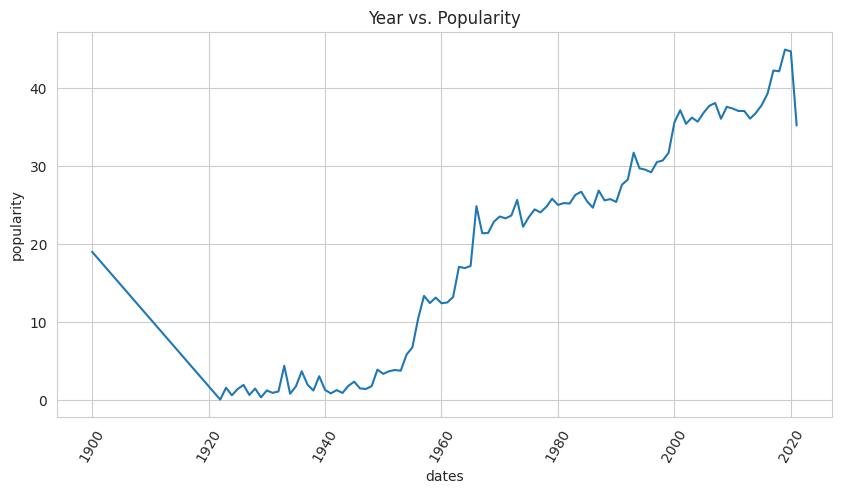

In [44]:
# Get average popularity per year
df_yearly_popularity = df_tracks.groupby(years)['popularity'].mean().reset_index()

# Create line graph to show the average popularity of songs for each year
sns.set_style("whitegrid")
figs_dim = (10, 5)
fig, ax = plt.subplots(figsize=figs_dim)
sns.lineplot(x=df_yearly_popularity[years.name], y=df_yearly_popularity['popularity'], ax=ax).set(title="Year vs. Popularity")
plt.xticks(rotation=60)

# Display the plot
plt.show()

* **Steady Increase in Popularity:** The average popularity of songs has steadily increased over time, surpassing a score of 40 by 2020.
* **Low Popularity (1920s - 1950s):** From the 1920s to the 1950s, song popularity remained near 0, showing little variation during this period.
* **Rising Popularity (1960s Onward):** Approaching the 1960s, the average popularity began to rise.

#### Average danceability over time

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


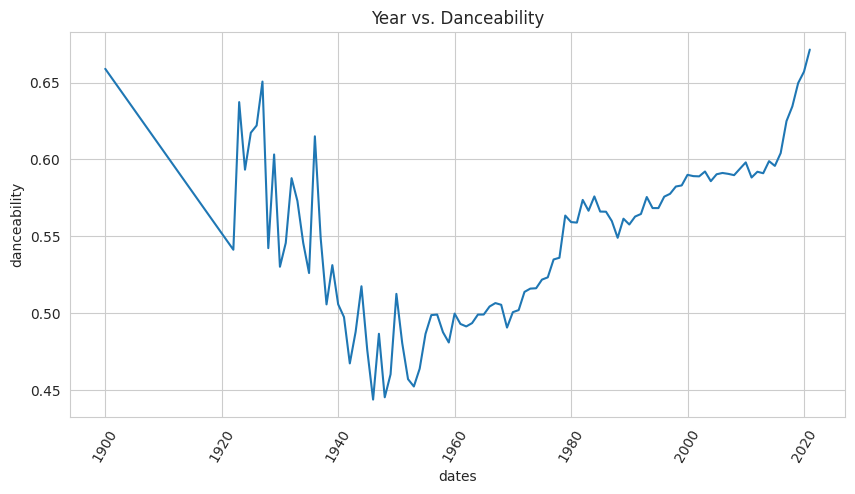

In [45]:
# Get average danceability per year
df_yearly_danceability = df_tracks.groupby(years)['danceability'].mean().reset_index()

# Create line graph to show the average danceability of songs for each year
sns.set_style("whitegrid")
figs_dim = (10, 5)
fig, ax = plt.subplots(figsize=figs_dim)
sns.lineplot(x=df_yearly_danceability[years.name], y=df_yearly_danceability['danceability'], ax=ax).set(title="Year vs. Danceability")

# Rotate x-axis labels for better readability
plt.xticks(rotation=60)

# Display the plot
plt.show()

* **Decline in Danceability (1920s - 1960s):** Danceability steadily decreased from the 1920s until the 1960s.
* **Consistent Increase (1960s - 2020):** From the 1960s through 2020, danceability showed a steady upward trend.
* **Sharp Decline (1900 - 1920):** There was a notable sharp decline in danceability from 1900 to the 1920s.
* **Highest Danceability Levels:** The early 1900s and the 2020s are marked by the highest danceability levels, both surpassing 0.65, with the 2020s showing a slightly higher peak.

## Conclusion & Next Steps <a class="anchor"  id="conclusion"></a>
### Conclusion

This analysis of Spotify's audio features across a vast range of tracks and genres has uncovered significant patterns related to listener preferences and track characteristics. One of the key findings is the diversity within Spotify's catalog, both in terms of artists and genres. With over 114,000 unique artists and a wide variety of genres ranging from the widely popular Comedy and Soundtrack to niche categories like A Capella, the platform offers something for everyone.

When examining specific audio features, I found that **danceability**, **energy**, and **loudness** were prominent in the top genres, such as Dance, Reggaeton, and Hip-hop, which emphasize rhythm, high-energy production, and impactful sound. On the other hand, genres like Classical and Movie were characterized by **longer durations**, **higher acousticness**, and **lower loudness**, suggesting a focus on traditional instrumentation and a more relaxed, narrative-driven experience.

The analysis also revealed a strong positive correlation between **energy and loudness**, indicating that louder tracks are often more energetic. Conversely, **acousticness and energy** showed a negative correlation, with acoustic tracks tending to be quieter and less energetic. Another key insight is the correlation between **popularity** and certain features like **danceability** and **acousticness**. The positive correlation with danceability reaffirms that tracks with higher danceability tend to resonate more with listeners, while the negative correlation with acousticness suggests that less acoustic tracks are generally more popular.

Additionally, our temporal analysis revealed trends over time, such as a **steady increase in song duration** from the 1960s to the 2010s, followed by a post-2020 decline. Similarly, **danceability** has seen a consistent rise, reflecting the increasing importance of rhythm and suitability for dancing in modern music.

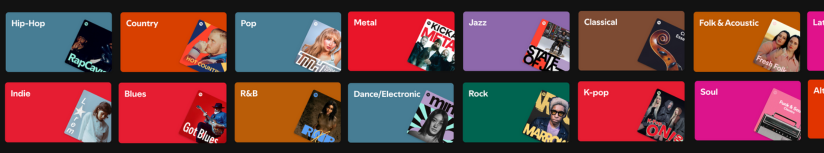

### Next Steps

1. **Deeper Genre-Specific Analysis:** Dive deeper into specific genres to understand what makes them unique. Analyzing sub-genres could provide more granular insights into niche listener preferences.

2. **Temporal Shifts in Preferences:** Further investigate the trends in track duration, danceability, and popularity over time to identify underlying causes, such as technological advancements or shifts in listener behavior.

3. **Feature Weighting for Predictive Modeling:** Utilize the insights on correlations (e.g., energy and loudness, danceability and popularity) to create predictive models that can forecast the popularity of future tracks based on their audio features.

4. **Audience Targeting:** Use the genre and feature insights to better target specific audiences with personalized recommendations, playlists, or marketing campaigns that align with their preferences.

5. **Incorporate Listener Feedback:** Combine the analysis of audio features with listener behavior (e.g., skips, saves, replays) to further refine what drives engagement and satisfaction on the platform.

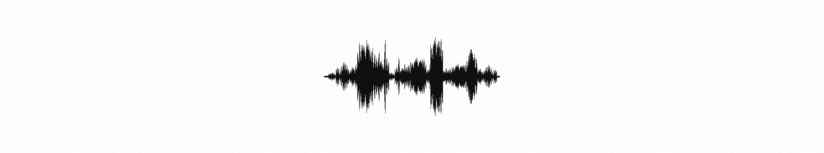

By continuing to explore the rich diversity of audio features and listener preferences, Spotify can enhance its ability to curate content and provide a personalized listening experience that resonates with its global audience.

Source: [Simplilearn](https://www.youtube.com/watch?v=8d7ywKCm6HI&list=WL&index=4&ab_channel=Simplilearn) (expanded upon from the original material).

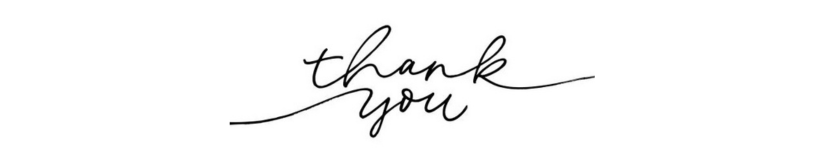